In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.utils import read_pkl

In [2]:
PATH_RESULTS = "/hpf/projects/lsung/projects/lguo/femr-on-sk/data/sanity_checks/stanford_vocab_ablation"

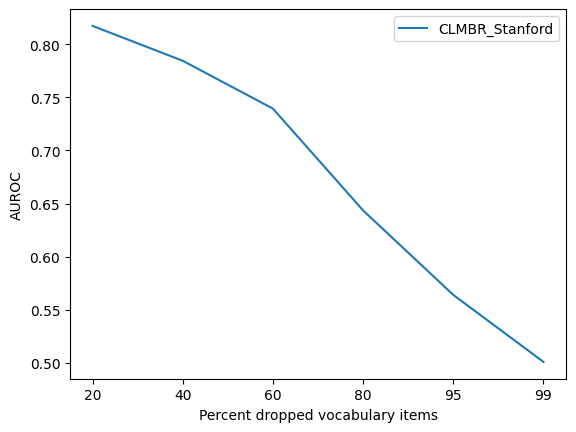

In [3]:
result_files = [
    x for x in os.listdir(PATH_RESULTS)
    if "result" in x
]

results = {}
for file in result_files:
    drop_perc = file.split('_')[-1].split('.')[0]
    results[drop_perc] = read_pkl(os.path.join(PATH_RESULTS, file))['auroc']
    
df = (
    pd.DataFrame.from_dict(results, orient="index")
    .sort_index()
    .rename(columns={0:"CLMBR_Stanford"})
)

df.plot()
plt.xlabel("Percent dropped vocabulary items")
plt.ylabel("AUROC")

plt.show()